<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2006%20%3A%20Recurrent%20Neural%20Networks%2C%20Time%20Series%20and%20Sequence%20Data/03_autoregressive_linearmodel_for_time_series_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTO REGRESSIVE LINEAR MODEL FOR TIME SERIES PREDICTION**



IMPORT THE LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PREPARE THE DATA

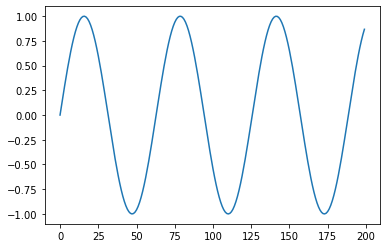

In [8]:
## make the synthetic data, very basic time series, a sine wave.
series = np.sin(0.1 * np.arange(200))
## plot the series
plt.plot(series)
plt.show()

In [17]:
range(len(series) - T)

range(0, 190)

In [21]:
## build the dataset.
## lets see if we can use T past values to predict the next values.
T = 10
X = []
Y = []

## loop over the range of len of series.
## and populate the X and Y.
for t in range(len(series) - T):
  #print(t)  ## 0 to 190
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print("X Shape", X.shape, "Y Shape", Y.shape)

X Shape (190, 10) Y Shape (190,)


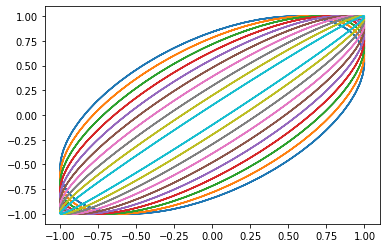

In [23]:
plt.plot(X,Y);

BUILD COMPILE AND TRAIN THE MODEL

In [24]:
## build the model
i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [26]:
## compile the model
model.compile(
    loss = "mse",
    optimizer = Adam(learning_rate = 0.1)
)

In [27]:
## train the model
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 100,
    validation_data = (X[-N//2:], Y[-N//2:])
)

Epoch 1/100
3/3 [==============================] - 1s 100ms/step - loss: 0.2926 - val_loss: 0.1301
Epoch 2/100
3/3 [==============================] - 0s 26ms/step - loss: 0.1035 - val_loss: 0.0651
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0426 - val_loss: 0.0042
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0281 - val_loss: 0.0204
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0215 - val_loss: 0.0339
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0331 - val_loss: 0.0201
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0171 - val_loss: 0.0266
Epoch 8/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0141 - val_loss: 0.0031
Epoch 9/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 10/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 11/100
3/3 [

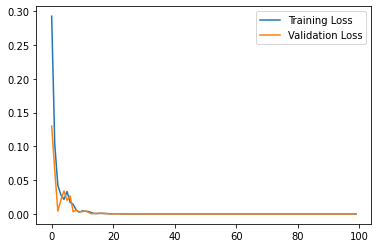

In [28]:
## plotting the loss
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show()

1/1 [==============================] - 0s 27ms/step


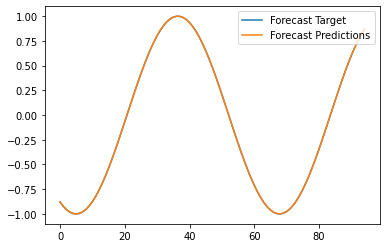

In [39]:
## wrong forecast using the true targets.
validation_target = Y[-N//2:]
# print(len(validation_target))
validation_predictions = []  ## empty list need to be appended after making the predictions.

## index of the first validation input
i = -N//2
# print(i)

## looping through the while loop
while len(validation_predictions) < len(validation_target):
  ## predict the model
  p = model.predict(X[i].reshape(1,-1))[0,0]
  # print(p)
  i += 1

  ## update the prediction list
  validation_predictions.append(p)

## plot the figure using the target and predictions.
plt.plot(validation_target, label = "Forecast Target")
plt.plot(validation_predictions, label = "Forecast Predictions")
plt.legend();
plt.show()

1/1 [==============================] - 0s 27ms/step


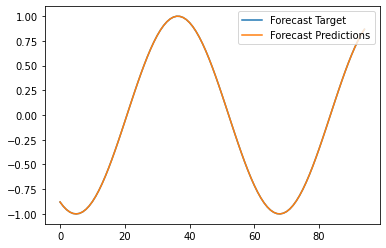

In [40]:
## forecast future values only using the self predictions for making the future predictions.
validation_target = Y[-N//2:]
# print(len(validation_target))
validation_predictions = []  ## empty list need to be appended after making the predictions.

## last train input
last_x = X[-N//2]  ## 1D array of length T

## looping through the while loop
while len(validation_predictions) < len(validation_target):
  ## predict the model
  p = model.predict(last_x.reshape(1,-1))[0,0]

  ## update the prediction list
  validation_predictions.append(p)

  ## make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

## plot the figure using the target and predictions.
plt.plot(validation_target, label = "Forecast Target")
plt.plot(validation_predictions, label = "Forecast Predictions")
plt.legend();
plt.show()


ADD NOISE AND RUN THE NOTEBOOK BELOW AGAIN.

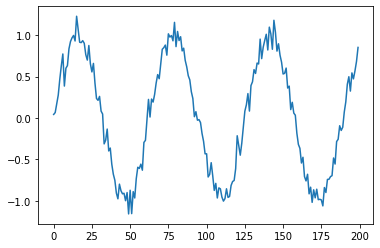

In [42]:
## make the synthetic data, very basic time series, a sine wave with noise
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1
## plot the series
plt.plot(series)
plt.show()

In [43]:
## build the dataset.
## lets see if we can use T past values to predict the next values.
T = 10
X = []
Y = []

## loop over the range of len of series.
## and populate the X and Y.
for t in range(len(series) - T):
  #print(t)  ## 0 to 190
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print("X Shape", X.shape, "Y Shape", Y.shape)

X Shape (190, 10) Y Shape (190,)


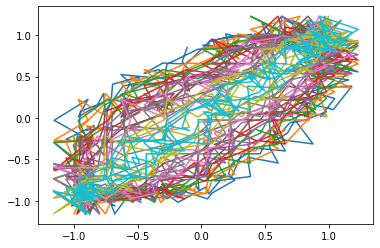

In [45]:
plt.plot(X,Y);

In [46]:
## build the model
i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i, x)
model.summary()

## compile the model
model.compile(
    loss = "mse",
    optimizer = Adam(learning_rate = 0.1)
)

## train the model
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 100,
    validation_data = (X[-N//2:], Y[-N//2:])
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 2s 121ms/step - loss: 0.6725 - val_loss: 0.2791
Epoch 2/100
3/3 [==============================] - 0s 40ms/step - loss: 0.5300 - val_loss: 0.2504
Epoch 3/100
3/3 [==============================] - 0s 35ms/step - loss: 0.1436 - val_loss: 0.0595
Epoch 4/100
3/3 [==============================] - 0s 41ms/step - loss: 0.1585 - val_loss: 0.1915
Epoch 5/100
3/3 [==============================] - 0s 37ms/step - 

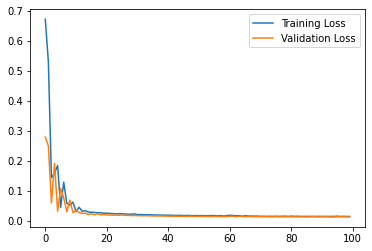

In [47]:
## plotting the loss
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show()

1/1 [==============================] - 0s 38ms/step


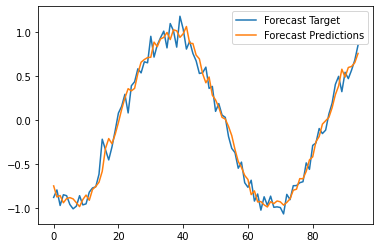

In [48]:
## Wrong Forecast
## wrong forecast using the true targets.
validation_target = Y[-N//2:]
# print(len(validation_target))
validation_predictions = []  ## empty list need to be appended after making the predictions.

## index of the first validation input
i = -N//2
# print(i)

## looping through the while loop
while len(validation_predictions) < len(validation_target):
  ## predict the model
  p = model.predict(X[i].reshape(1,-1))[0,0]
  # print(p)
  i += 1

  ## update the prediction list
  validation_predictions.append(p)

## plot the figure using the target and predictions.
plt.plot(validation_target, label = "Forecast Target")
plt.plot(validation_predictions, label = "Forecast Predictions")
plt.legend();
plt.show()

1/1 [==============================] - 0s 39ms/step


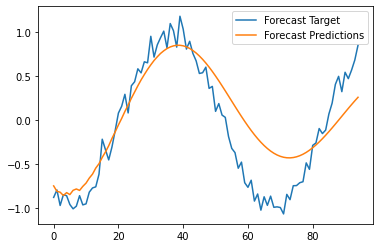

In [49]:
## forecast future values only using the self predictions for making the future predictions.
validation_target = Y[-N//2:]
# print(len(validation_target))
validation_predictions = []  ## empty list need to be appended after making the predictions.

## last train input
last_x = X[-N//2]  ## 1D array of length T

## looping through the while loop
while len(validation_predictions) < len(validation_target):
  ## predict the model
  p = model.predict(last_x.reshape(1,-1))[0,0]

  ## update the prediction list
  validation_predictions.append(p)

  ## make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

## plot the figure using the target and predictions.
plt.plot(validation_target, label = "Forecast Target")
plt.plot(validation_predictions, label = "Forecast Predictions")
plt.legend();
plt.show()


The Prediction is not that Good. But the Model is Understanding the Prediction is Periodically Done.

***